# Bayesian Runtime Calculator (Adidas) R Colab v0.2

<i>The version supports two variants (including control).</i> <br>
<i>Separate version release for 3 variants </i>

### 1. Version Notes

|<b> Environment:</b><br>
R 3.6<br>
Required packages-Base R packages and Tidyverse:<br>

|
<b>Runtime Preparation:</b><br>
We need to collect a **5-week** sample of total visits and total conversions on the segment.<br>
This goes in as an input to f1 and f2 respectively <br>

In [2]:
library("tidyverse")
library("parallel")
source("https://gist.githubusercontent.com/benschipper/9ce3768689916e2cee78e82fa7a60db6/raw/5454d939d1da0bd424d10a20df685089995b9456/BayesRun_GCE1.R")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### 2. Manual input 
pgt -> Page Type<br>
kpi -> Primary KPI tested for<br>
Market -> Market coverage for the test <br>
f1 -> 5 week total sample collected  <br>
f2 -> 5 week total conversions  <br>
<br>
mde -> Option is open for processing against multiple MDEs in a batch eg.  <br>
To run against a single MDE -> use <b>" mde = c(2.0) </b> "  For mde say 2.0  <br>
To submit batch for Multiple MDEs -> use <b>" mde = c(0.5,0.7,0.8,1.0,1.3,1.5,1.8,2.0) "</b>  |  For mde say between 0.5 & 2.0  <br>
#### Carefully input the values for each variable <br>
<i>The Page type / KPI/ Market variables are only for debugging/user reference and not mandatory for script execution. <br>
f1 & f2 & mde are mandatory var inputs required by the script.<i/>

For example:
ATP-4220
Visits Seg - Outdoor PLPs: **317941**
Visits Cov Seg -  Outdoor PLPs > A2C : **197085**


In [4]:
## Manual Input cell 794180

pgt = 'Delivery Page' 
kpi = 'Order Conversion'
Market = 'US'
f1 = 317941 
f2 = 197085 
##---------- use c(0.5,0.7,0.8,1.0,1.3,1.5,1.8,2.0) for multiple MDEs --------------##
mde= c(2.0) 
cat(sprintf("Conversion Rate: \"%f\"\n", round(f2/f1,7)*100))

Conversion Rate: "61.987920"


# 3. Perform calculations

In [5]:
system.time(sim_rope_1 <-
  crossing(mde  = c(mde),
           power = c(0.8)) %>% 
  mutate(results = map2_dbl(pgt=pgt,kpi=kpi,mde, power,inc=1,hdi_mass=0.95, five_wk_sz=f1,
                five_wk_conv=f2,sim_power)))

[1] "Computation in progress..."
[1] "no eta"


   user  system elapsed 
 22.487   1.053  12.147 

## 4. Display Tabular results

In [64]:
sim_rope_df <- data.frame(sim_rope_1) %>% 
 rename(Sample_Size_per_Variant=results) %>% 
 mutate(PageType = pgt, PrimaryKPI=kpi,Market=Market,fiveweeksize =f1,conversions=f2, Runtime_weeks= ceiling((Sample_Size_per_Variant*2)/(f1/5)))  %>% 
 select(PageType , PrimaryKPI,Market,mde,	power,	Sample_Size_per_Variant	, Runtime_weeks,fiveweeksize, conversions)

sim_rope_df

PageType,PrimaryKPI,Market,mde,power,Sample_Size_per_Variant,Runtime_weeks,fiveweeksize,conversions
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Delivery Page,Order Conversion,US,2,0.8,14933.27,1,317941,197085


## 5. Export & download results as csv

In [63]:
## Save a copy as csv
write_csv(sim_rope_df,"report.csv")


---




*After running the cell contents above go to the "Files" Pane on the left where the .csv file can be located.*

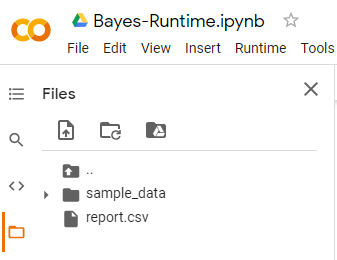

*It may then be downloaded locally (Right-click -> Download)*

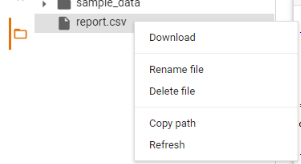

---

